In [7]:
import matplotlib.pyplot as plt 
import pandas as pd
from datetime import datetime

In [8]:
# Specify root directory with example CSVs
ROOT = '/content/drive/My Drive/2021_LT-CCDC/examples/'

In [9]:
def read_ee_ccdc (root, sample, spectral):
  # Read CCDC CSV into pandas dataframe
  ccdc = pd.read_csv('{root}{sample}_ccdc_{spectral}.csv'.format(sample=sample, 
                                                                 root=root, 
                                                                 spectral=spectral))

  # Convert date values to datetime format
  ccdc['Date'] = pd.to_datetime(ccdc['Date'])
  return ccdc

def read_ee_lt (root, sample, spectral):
  # Read LT CSV into pandas dataframe
  lt = pd.read_csv('{root}{sample}_lt_{spectral}.csv'.format(sample=sample, 
                                                             root=root, 
                                                             spectral=spectral))

  # Convert date values to datetime format
  lt['Year'] = lt['Year'].str.replace(',','') + '-07-20'
  lt['Year'] = pd.to_datetime(lt.Year, format='%Y-%m-%d')

  if spectral.startswith('tcw') or spectral.startswith('tcg'):
    lt['Original'] = lt['Original'].astype('str').str.replace(',','').astype(float)/10000
    lt['Fitted'] = lt['Fitted'].astype('str').str.replace(',','').astype(float)/10000
  else :
    lt['Original'] = lt['Original']/1000
    lt['Fitted'] = lt['Fitted']/1000

  return lt

In [10]:
# Function to plot single horizontal year line
def year_line(ax1, ax2, year):
  ax[ax1][ax2].axvline(year, color='0.75', linewidth=1, zorder=0)

# Function to plot all year lines for specified range
def plt_year_lines(year_start, year_end, rows, cols):
  years = list(range(year_start, year_end))
  for i, year in enumerate(years):
    year = datetime.strptime('{year}-01-01'.format(year=year), '%Y-%m-%d')
    for col in list(range(0, cols)):
      for row in list(range(0, rows)):
        year_line(row, col, year)

# Function to plot times series of all clear observations using CCDC output
def plt_timeseries(ax1, ax2, ccdc_df, ymin, ymax, ylabel, title, color='0.5', 
                   ylabel_shown=True, xticks_shown=True, yticks_shown=True):
  ax[ax1][ax2].scatter(ccdc_df['Date'], ccdc_df['Observation'], c=color, 
                       s=6, marker='o')
  ax[ax1][ax2].set_ylim(ymin, ymax)
  if ylabel_shown == True:
    ax[ax1][ax2].set_ylabel(ylabel)
  if xticks_shown == False:
    ax[ax1][ax2].axes.get_xaxis().set_ticks([])
  if yticks_shown == False:
    ax[ax1][ax2].axes.get_yaxis().set_ticks([])
  ax[ax1][ax2].axhline(0, color='0.75', lw=0.5, zorder=0)
  ax[ax1][ax2].set_title(title, loc='left', fontname='Liberation Serif')

# Function to plot time series of medoid values using LandTrendr output
def plt_medoids(ax1, ax2, lt_df, ymin, ymax, ylabel, title, color='0.5', 
                   ylabel_shown=True, xticks_shown=True, yticks_shown=True):
  ax[ax1][ax2].scatter(lt_df['Year'], lt_df['Original'], c=color, 
                       s=8, marker='o', zorder=2)
  ax[ax1][ax2].set_ylim(ymin, ymax)
  if ylabel_shown == True:
    ax[ax1][ax2].set_ylabel(ylabel)
  if xticks_shown == False:
    ax[ax1][ax2].axes.get_xaxis().set_ticks([])
  if yticks_shown == False:
    ax[ax1][ax2].axes.get_yaxis().set_ticks([])
  ax[ax1][ax2].axhline(0, color='0.75', lw=0.5, zorder=0)
  ax[ax1][ax2].set_title(title, loc='left', fontname='Liberation Serif')

# Function to plot LandTrendr segmentation result
def plt_lt(ax1, ax2, lt_df, ymin, ymax, ylabel, title, linecolor='#DC143C', 
           ylabel_shown=True, xticks_shown=True, yticks_shown=True):
  ax[ax1][ax2].plot(lt_df['Year'], lt_df['Fitted'], c=linecolor, lw=1.25)
  ax[ax1][ax2].scatter(lt_df['Year'], lt_df['Original'], c='0.5', 
                       s=8, marker='o', zorder=2)
  ax[ax1][ax2].set_ylim(ymin, ymax)
  if ylabel_shown == True:
    ax[ax1][ax2].set_ylabel(ylabel)
  if xticks_shown == False:
    ax[ax1][ax2].axes.get_xaxis().set_ticks([])
  if yticks_shown == False:
    ax[ax1][ax2].axes.get_yaxis().set_ticks([])
  ax[ax1][ax2].axhline(0, color='0.75', lw=0.5, zorder=0)
  ax[ax1][ax2].set_title(title, loc='left', fontname='Liberation Serif')

# Function to plot LandTrendr vertices
def plt_lt_vertices(ax1, ax2, lt_df, year_indices):
  for i in year_indices:
    ax[ax1][ax2].scatter(lt_df.iloc[i]['Year'], lt_df.iloc[i]['Fitted'], s=45, 
                         c='w', edgecolors='k', zorder=3)

# Function to plot single CCDC segment
def plt_ccdc_seg(ax1, ax2, ccdc_df, seg, linecolor):
  ax[ax1][ax2].plot(ccdc_df['Date'], ccdc_df['fit ' + str(seg)], c=linecolor, lw=1)

# Function to plot full CCDC segmentation results
def plt_ccdc(ax1, ax2, ccdc_df, ymin, ymax, ylabel, title, linecolor='#0000CD', 
             ylabel_shown=True, xticks_shown=True, yticks_shown=True, 
             num_segs=1):
  plt_timeseries(ax1, ax2, ccdc_df, ymin, ymax, ylabel, title, color='0.75', 
                 ylabel_shown=ylabel_shown, xticks_shown=xticks_shown,
                 yticks_shown=yticks_shown)
  for seg in list(range(1, num_segs)):
    plt_ccdc_seg(ax1, ax2, ccdc_df, seg, linecolor)

# Function to plot CCDC breaks
def plt_ccdc_breaks(ax1, ax2, ccdc_df, num_segs=1):
  for b in list(range(1, num_segs)):
    ax[ax1][ax2].axvline(ccdc_df.iloc[ccdc_df['fit ' + str(b)].dropna().index.max()]['Date'], 
                         color='k', lw=1.25, ls='--')

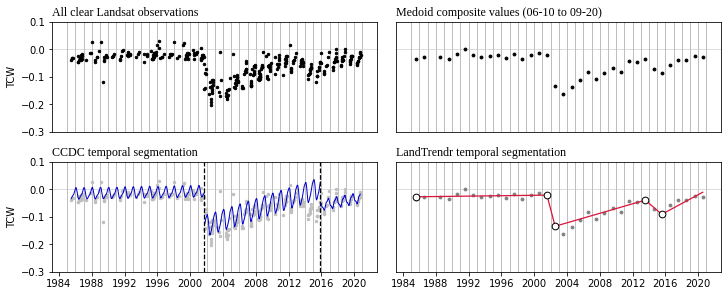

In [11]:
# FIGURE 1: Compare inputs and segmentation results for single index
SAMPLE = 'ME-USA'

ccdc = read_ee_ccdc(ROOT, SAMPLE, 'tcw')
lt = read_ee_lt(ROOT, SAMPLE, 'tcw')

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True)
fig.set_size_inches(10, 4)

plt_year_lines(1985, 2022, rows, cols)

# Full time series
plt_timeseries(0, 0, ccdc, -0.3, 0.1, 'TCW', 'All clear Landsat observations', 
               color='k', xticks_shown=False)

# CCDC
plt_ccdc(1, 0, ccdc, -0.3, 0.1, 'TCW', 'CCDC temporal segmentation', num_segs=4)
plt_ccdc_breaks(1, 0, ccdc, 3)

# Medoid composite values
plt_medoids(0, 1, lt, -0.3, 0.1, 'TCW', 'Medoid composite values (06-10 to 09-20)', 
            color='k', xticks_shown=False, yticks_shown=False, ylabel_shown=False)

# LandTrendr
plt_lt(1, 1, lt, -0.3, 0.1, 'TCW', 'LandTrendr temporal segmentation', 
       yticks_shown=False, ylabel_shown=False)
plt_lt_vertices(1, 1, lt, [0, 15, 16, 27, 29])

fig.patch.set_facecolor('white')
plt.show()

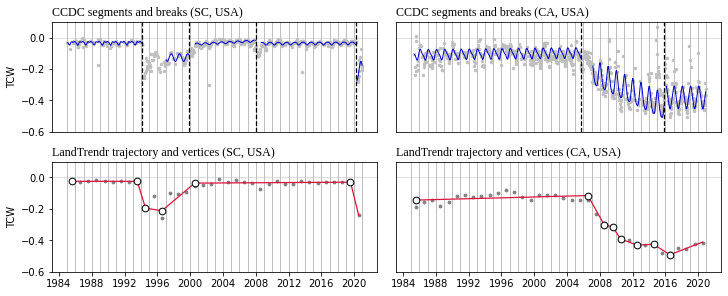

In [12]:
# FIGURE 2: Compare functional forms
SAMPLE_1 = 'SC-USA'
SAMPLE_2 = 'CA-USA'

ccdc_1 = read_ee_ccdc(ROOT, SAMPLE_1, 'tcw')
lt_1 = read_ee_lt(ROOT, SAMPLE_1, 'tcw')

ccdc_2 = read_ee_ccdc(ROOT, SAMPLE_2, 'tcw')
lt_2 = read_ee_lt(ROOT, SAMPLE_2, 'tcw')

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True)
fig.set_size_inches(10, 4)

plt_year_lines(1985, 2022, rows, cols)

# South Carolina
plt_ccdc(0, 0, ccdc_1, -0.6, 0.1, 'TCW', 'CCDC segments and breaks (SC, USA)', 
         xticks_shown=False, num_segs=6)
plt_ccdc_breaks(0, 0, ccdc_1, 5)

plt_lt(1, 0, lt_1, -0.6, 0.1, 'TCW', 'LandTrendr trajectory and vertices (SC, USA)')
plt_lt_vertices(1, 0, lt_1, [0, 8, 9, 11, 15, 34])

# California
plt_ccdc(0, 1, ccdc_2, -0.6, 0.1, 'TCW', 'CCDC segments and breaks (CA, USA)', 
         xticks_shown=False, yticks_shown= False, ylabel_shown=False, num_segs=5)
plt_ccdc_breaks(0, 1, ccdc_2, 3)

plt_lt(1, 1, lt_2, -0.6, 0.1, 'TCW', 'LandTrendr trajectory and vertices (CA, USA)', 
       yticks_shown= False, ylabel_shown=False)
plt_lt_vertices(1, 1, lt_2, [0, 21, 23, 24, 25, 27, 29, 31])

fig.patch.set_facecolor('white')
plt.show()

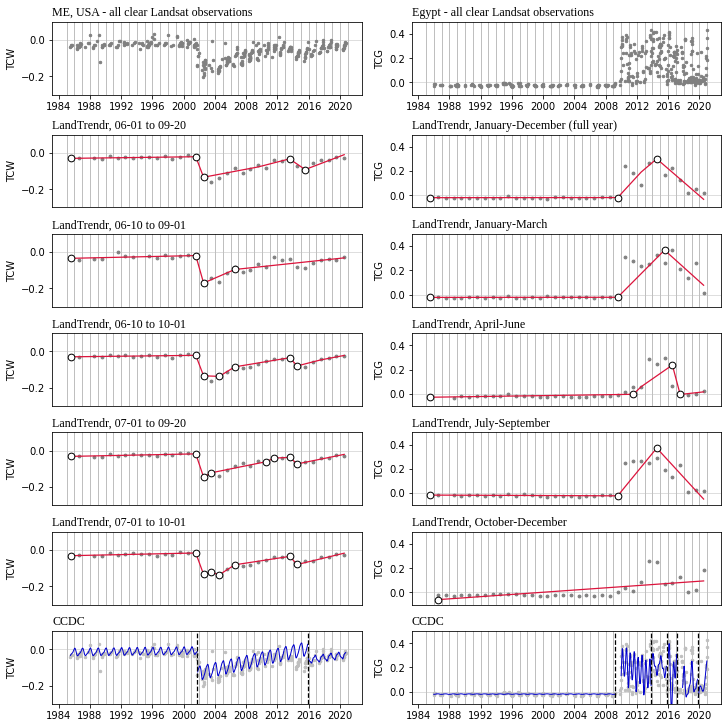

In [13]:
# FIGURE 3: Compare compositing periods
SAMPLE_1 = 'ME-USA'
ccdc_1 = read_ee_ccdc(ROOT, SAMPLE_1, 'tcw')
lt_1_b = read_ee_lt(ROOT, SAMPLE_1, 'tcw_0601-0920')
lt_1_c = read_ee_lt(ROOT, SAMPLE_1, 'tcw_0610-0901')
lt_1_d = read_ee_lt(ROOT, SAMPLE_1, 'tcw_0610-1001')
lt_1_e = read_ee_lt(ROOT, SAMPLE_1, 'tcw_0701-0920')
lt_1_f = read_ee_lt(ROOT, SAMPLE_1, 'tcw_0701-1001')

SAMPLE_2 = 'EGYPT'
ccdc_2 = read_ee_ccdc(ROOT, SAMPLE_2, 'tcg')
lt_2_b = read_ee_lt(ROOT, SAMPLE_2, 'tcg_01-12')
lt_2_c = read_ee_lt(ROOT, SAMPLE_2, 'tcg_01-03')
lt_2_d = read_ee_lt(ROOT, SAMPLE_2, 'tcg_04-06')
lt_2_e = read_ee_lt(ROOT, SAMPLE_2, 'tcg_07-09')
lt_2_f = read_ee_lt(ROOT, SAMPLE_2, 'tcg_10-12')

rows = 7
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True)
fig.set_size_inches(10, 10)

plt_year_lines(1985, 2022, rows, cols)

# Maine
plt_timeseries(0, 0, ccdc_1, -0.3, 0.1, 'TCW', 
               'ME, USA - all clear Landsat observations')
plt_lt(1, 0, lt_1_b, -0.3, 0.1, 'TCW', 'LandTrendr, 06-01 to 09-20', 
       xticks_shown=False)
plt_lt_vertices(1, 0, lt_1_b, [0, 15, 16, 27, 29])
plt_lt(2, 0, lt_1_c, -0.3, 0.1, 'TCW', 'LandTrendr, 06-10 to 09-01', 
       xticks_shown=False)
plt_lt_vertices(2, 0, lt_1_c, [0, 13, 14, 18])
plt_lt(3, 0, lt_1_d, -0.3, 0.1, 'TCW', 'LandTrendr, 06-10 to 10-01', 
       xticks_shown=False)
plt_lt_vertices(3, 0, lt_1_d, [0, 15, 16, 18, 20, 27, 28])
plt_lt(4, 0, lt_1_e, -0.3, 0.1, 'TCW', 'LandTrendr, 07-01 to 09-20', 
       xticks_shown=False)
plt_lt_vertices(4, 0, lt_1_e, [0, 15, 16, 17, 24, 25, 27, 28])
plt_lt(5, 0, lt_1_f, -0.3, 0.1, 'TCW', 'LandTrendr, 07-01 to 10-01', 
       xticks_shown=False)
plt_lt_vertices(5, 0, lt_1_f, [0, 15, 16, 17, 18, 20, 27, 28])
plt_ccdc(6, 0, ccdc_1, -0.3, 0.1, 'TCW', 'CCDC', num_segs=4)
plt_ccdc_breaks(6, 0, ccdc_1, 3)

# Egypt
plt_timeseries(0, 1, ccdc_2, -0.1, 0.5, 'TCG', 
               'Egypt - all clear Landsat observations')
plt_lt(1, 1, lt_2_b, -0.1, 0.5, 'TCG', 'LandTrendr, January-December (full year)', 
       xticks_shown=False)
plt_lt_vertices(1, 1, lt_2_b, [0, 24, 29])
plt_lt(2, 1, lt_2_c, -0.1, 0.5, 'TCG', 'LandTrendr, January-March', 
       xticks_shown=False)
plt_lt_vertices(2, 1, lt_2_c, [0, 24, 30])
plt_lt(3, 1, lt_2_d, -0.1, 0.5, 'TCG', 'LandTrendr, April-June', 
       xticks_shown=False)
plt_lt_vertices(3, 1, lt_2_d, [0, 24, 29, 30])
plt_lt(4, 1, lt_2_e, -0.1, 0.5, 'TCG', 'LandTrendr, July-September', 
       xticks_shown=False)
plt_lt_vertices(4, 1, lt_2_e, [0, 23, 28])
plt_lt(5, 1, lt_2_f, -0.1, 0.5, 'TCG', 'LandTrendr, October-December', 
       xticks_shown=False)
plt_lt_vertices(5, 1, lt_2_f, [0])
plt_ccdc(6, 1, ccdc_2, -0.1, 0.5, 'TCG', 'CCDC', num_segs=7)
plt_ccdc_breaks(6, 1, ccdc_2, 6)

fig.patch.set_facecolor('white')
plt.show()

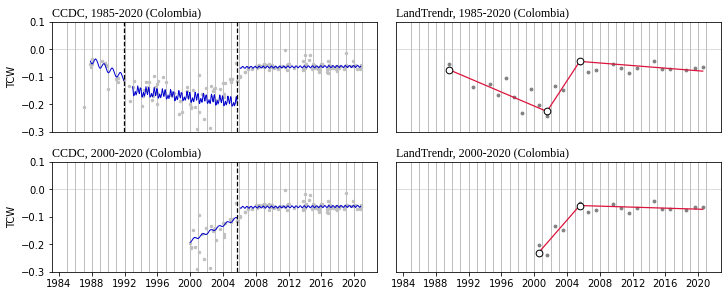

In [14]:
# FIGURE 4: Compare temporal intervals
SAMPLE = 'COLOMBIA'
ccdc_a = read_ee_ccdc(ROOT, SAMPLE, 'tcw_1985-2020')
ccdc_b = read_ee_ccdc(ROOT, SAMPLE, 'tcw_2000-2020')
lt_c = read_ee_lt(ROOT, SAMPLE, 'tcw_1985-2020')
lt_d = read_ee_lt(ROOT, SAMPLE, 'tcw_2000-2020')

rows = 2
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True)
fig.set_size_inches(10, 4)

plt_year_lines(1985, 2022, rows, cols)

plt_ccdc(0, 0, ccdc_a, -0.3, 0.1, 'TCW', 'CCDC, 1985-2020 (Colombia)', num_segs=5,
         xticks_shown= False)
plt_ccdc_breaks(0, 0, ccdc_a, 3)
plt_ccdc(1, 0, ccdc_b, -0.3, 0.1, 'TCW', 'CCDC, 2000-2020 (Colombia)', num_segs=5)
plt_ccdc_breaks(1, 0, ccdc_b, 2)

plt_lt(0, 1, lt_c, -0.3, 0.1, 'TCW', 'LandTrendr, 1985-2020 (Colombia)',
       xticks_shown= False, yticks_shown= False, ylabel_shown=False)
plt_lt_vertices(0, 1, lt_c, [0, 9, 12])
plt_lt(1, 1, lt_d, -0.3, 0.1, 'TCW', 'LandTrendr, 2000-2020 (Colombia)',
       yticks_shown= False, ylabel_shown=False)
plt_lt_vertices(1, 1, lt_d, [0, 4])

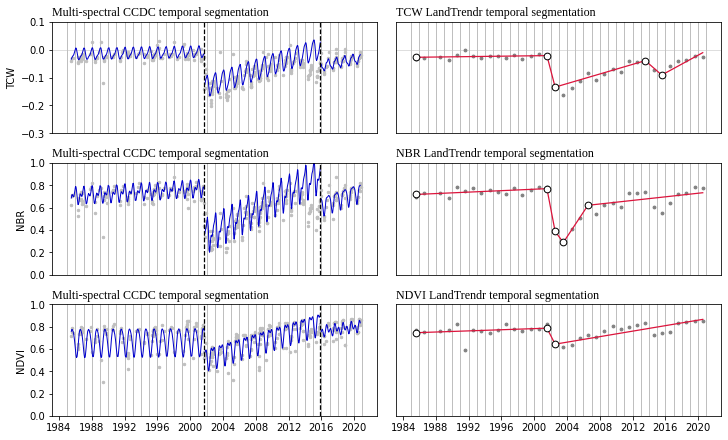

In [15]:
# FIGURE 5: Compare segmentation results for different indices
SAMPLE = 'ME-USA'

ccdc_nbr = read_ee_ccdc(ROOT, SAMPLE, 'nbr')
ccdc_ndvi = read_ee_ccdc(ROOT, SAMPLE, 'ndvi')
ccdc_tcw = read_ee_ccdc(ROOT, SAMPLE, 'tcw')

lt_nbr = read_ee_lt(ROOT, SAMPLE, 'nbr')
lt_ndvi = read_ee_lt(ROOT, SAMPLE, 'ndvi')
lt_tcw = read_ee_lt(ROOT, SAMPLE, 'tcw')

rows = 3
cols = 2
fig, ax = plt.subplots(rows, cols, constrained_layout=True)
fig.set_size_inches(10, 6)

plt_year_lines(1985, 2022, rows, cols)

# TCW
plt_ccdc(0, 0, ccdc_tcw, -0.3, 0.1, 'TCW', 'Multi-spectral CCDC temporal segmentation', 
         num_segs=4, xticks_shown=False)
plt_ccdc_breaks(0, 0, ccdc_tcw, 3)
plt_lt(0, 1, lt_tcw, -0.3, 0.1, 'TCW', 'TCW LandTrendr temporal segmentation', 
       yticks_shown=False, ylabel_shown=False, xticks_shown=False)
plt_lt_vertices(0, 1, lt_tcw, [0, 15, 16, 27, 29])

# NBR
plt_ccdc(1, 0, ccdc_nbr, 0, 1, 'NBR', 'Multi-spectral CCDC temporal segmentation', 
         num_segs=4, xticks_shown=False)
plt_ccdc_breaks(1, 0, ccdc_nbr, 3)
plt_lt(1, 1, lt_nbr, 0, 1, 'NBR', 'NBR LandTrendr temporal segmentation', 
       yticks_shown=False, ylabel_shown=False, xticks_shown=False)
plt_lt_vertices(1, 1, lt_nbr, [0, 15, 16, 17, 20])

# NDVI
plt_ccdc(2, 0, ccdc_ndvi, 0, 1, 'NDVI', 'Multi-spectral CCDC temporal segmentation', 
         num_segs=4)
plt_ccdc_breaks(2, 0, ccdc_ndvi, 3)
plt_lt(2, 1, lt_ndvi, 0, 1, 'NDVI', 'NDVI LandTrendr temporal segmentation', 
       yticks_shown=False, ylabel_shown=False)
plt_lt_vertices(2, 1, lt_ndvi, [0, 15, 16])

fig.patch.set_facecolor('white')
plt.show()
